In [46]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, normalize

In [78]:
filename = 'CRTRAITS.TXT'

data = pd.read_csv(filename, sep='\t', encoding='utf-8')
data.head()

,Singular,Plural,Wood,Mercury,Ore,Sulfur,Crystal,Gems,Gold,Fight Value,...,Attack,Defense,MinDmg,MaxDmg,Shots,Spells,GuardsLow,GuardsHigh,Ability Text,Attributes
0,Pikinier,Pikinierzy,0,0,0,0,0,0,60,100,...,4,5,1,3,0,0,20,50,Powstrzymuje szarżę.,0
1,Halabardnik,Halabardnicy,0,0,0,0,0,0,75,115,...,6,5,2,3,0,0,20,30,Powstrzymuje szarżę.,0
2,Łucznik,Łucznicy,0,0,0,0,0,0,100,115,...,6,3,2,3,12,0,16,30,NaN,SHOOTING_ARMY
3,Kusznik,Kusznicy,0,0,0,0,0,0,150,115,...,6,3,2,3,24,0,16,25,Strzela dwukrotnie.,const_two_attacks | SHOOTING_ARMY
4,Gryf,Gryfy,0,0,0,0,0,0,200,324,...,8,8,3,6,0,0,12,25,Dwukrotnie kontratakuje.,DOUBLE_WIDE | FLYING_ARMY


In [79]:
name = ['Singular']
crap = ['Plural', 'Wood', 'Mercury', 'Ore', 'Sulfur', 'Crystal', 'Gems', 'Gold', 'Ability Text']
growth = ['Growth', 'Horde Growth']
abilities = ['Attributes']
spells = ['Spells']
guards_quantity = ['GuardsLow', 'GuardsHigh']

cols_to_drop = name + crap + growth + abilities + guards_quantity
data.drop(cols_to_drop, axis=1, inplace=True)

In [49]:
data.head()

,Fight Value,AI Value,Hit Points,Speed,Attack,Defense,MinDmg,MaxDmg,Shots,Spells
0,100,80,10,4,4,5,1,3,0,0
1,115,115,10,5,6,5,2,3,0,0
2,115,126,10,4,6,3,2,3,12,0
3,115,184,10,6,6,3,2,3,24,0
4,324,351,25,6,8,8,3,6,0,0


In [50]:
def print_lreg_coeffs(model):
    for (k,v) in zip(list(data.columns.values[2:]) + ['bias'], list(model.coef_) + [model.intercept_]):
        print (k + ': ').ljust(12) + '{:.2f}'.format(v).rjust(6)

In [55]:
X = normalize(np.log(data.drop(['Fight Value', 'AI Value'], axis=1)+1), axis=0)

In [56]:
X[0]

array([ 0.05140311,  0.06477993,  0.05452266,  0.06265788,  0.02600721,
        0.04515827,  0.        ,  0.        ])

In [57]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.DataFrame.from_items(zip(data.columns.values[2:], np.corrcoef(X.T)), 
                        orient='index', columns=data.columns.values[2:])

,Hit Points,Speed,Attack,Defense,MinDmg,MaxDmg,Shots,Spells
Hit Points,1.00,0.24,0.76,0.84,0.79,0.76,-0.09,0.12
Speed,0.24,1.00,0.61,0.54,0.61,0.66,-0.25,0.15
Attack,0.76,0.61,1.00,0.89,0.87,0.90,-0.00,0.12
Defense,0.84,0.54,0.89,1.00,0.88,0.88,-0.15,0.12
MinDmg,0.79,0.61,0.87,0.88,1.00,0.98,-0.15,0.07
MaxDmg,0.76,0.66,0.90,0.88,0.98,1.00,-0.17,0.09
Shots,-0.09,-0.25,-0.00,-0.15,-0.15,-0.17,1.00,0.09
Spells,0.12,0.15,0.12,0.12,0.07,0.09,0.09,1.00


Score: 0.939055524676

Hit Points:   7.80
Speed:       12.93
Attack:      13.05
Defense:      5.79
MinDmg:       7.55
MaxDmg:      17.77
Shots:       -1.28
Spells:       0.55
bias:         1.10


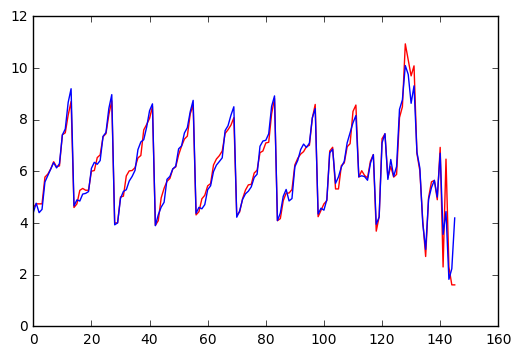

In [58]:
y = np.log(data['Fight Value'])

l_reg = LinearRegression().fit(X, y)

plt.plot(np.arange(len(X)), y, 'r')
plt.plot(np.arange(len(X)), l_reg.predict(X))

print 'Score: {}\n'.format(l_reg.score(X, y))
print_lreg_coeffs(l_reg)

Score: 0.980079463719

Hit Points:  41.35
Speed:       16.34
Attack:      -7.46
Defense:     -2.36
MinDmg:       7.31
MaxDmg:       7.85
Shots:        1.39
Spells:      -0.01
bias:         1.41


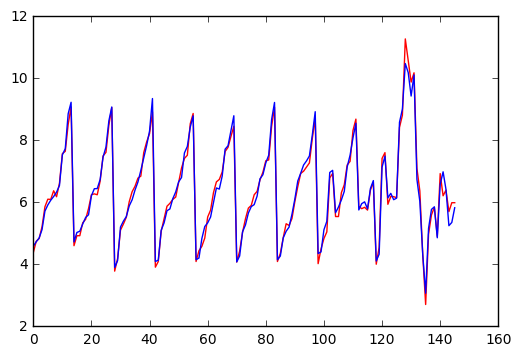

In [59]:
y = np.log(data['AI Value'])

l_reg = LinearRegression().fit(X, y)

plt.plot(np.arange(len(X)), y, 'r')
plt.plot(np.arange(len(X)), l_reg.predict(X))

print 'Score: {}\n'.format(l_reg.score(X, y))
print_lreg_coeffs(l_reg)

Score: 0.905347407871

Hit Points:   1.60
Speed:        2.38


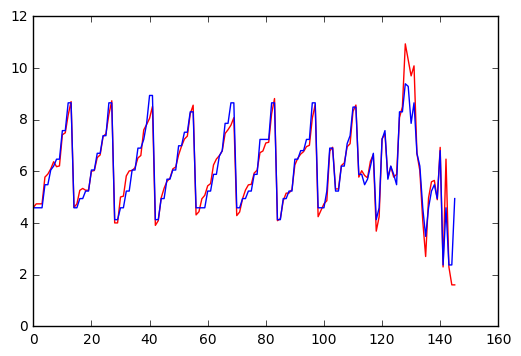

In [67]:
x = data['MaxDmg'].values[np.newaxis].T
x = np.log(x+1)
y = data['Fight Value']
y = np.log(y)

l_reg = LinearRegression().fit(x, y)

plt.plot(np.arange(len(x)), y, 'r')
plt.plot(np.arange(len(x)), l_reg.predict(x))

print 'Score: {}\n'.format(l_reg.score(x, y))
print_lreg_coeffs(l_reg)

Score: 0.864935696873

Hit Points:   1.10
Speed:        2.42


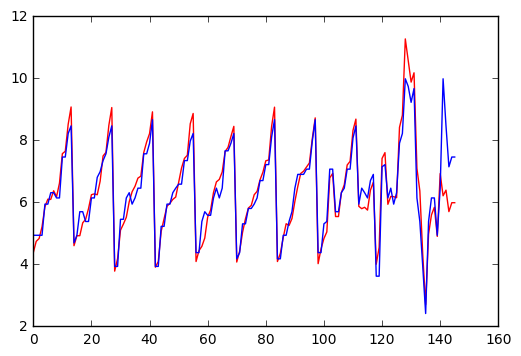

In [70]:
x = data['Hit Points'].values[np.newaxis].T
x = np.log(x)
y = data['AI Value']
y = np.log(y)

l_reg = LinearRegression().fit(x, y)

plt.plot(np.arange(len(x)), y, 'r')
plt.plot(np.arange(len(x)), l_reg.predict(x))

print 'Score: {}\n'.format(l_reg.score(x, y))
print_lreg_coeffs(l_reg)

In [71]:
data

,Fight Value,AI Value,Hit Points,Speed,Attack,Defense,MinDmg,MaxDmg,Shots,Spells
0,100,80,10,4,4,5,1,3,0,0
1,115,115,10,5,6,5,2,3,0,0
2,115,126,10,4,6,3,2,3,12,0
3,115,184,10,6,6,3,2,3,24,0
4,324,351,25,6,8,8,3,6,0,0
5,364,448,25,9,9,9,3,6,0,0
6,445,445,35,5,10,12,6,9,0,0
7,588,588,35,6,12,12,7,10,0,0
8,485,485,30,5,12,7,10,12,12,0
9,500,750,30,7,12,10,10,12,24,0
